# Simulations Data Analysis

### Extract the simulation results

In [1]:
import pandas as pd
from data_parser import summarize_runs
from data_parser import process_raw_runs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [2]:
# Run only if sim data is updated.
#summarize_runs()
#process_raw_runs()

In [3]:
data = pd.read_csv('../processed_data/phase1_sim_sum.csv')

In [5]:
data.head()

,run_no,avg_susceptibility,avg_recovery_time,initial_population,initial_infected,average_death_rate,average_recovery_rate,quarantine_delay,mass_testing_intensity,social_distancing_intensity,...,final_pop,day_max_infected,day_max_infetion,total_infected,total_recovered,total_deaths,total_quarantined,max_infected,max_variance,max_mean
0,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,...,1931.0,36.0,25.0,2554.0,1930.0,3069.0,0.0,10.0,1.402448,2.333333
1,2.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,...,2292.0,65.0,43.0,1588.0,1541.0,2708.0,0.0,15.0,1.541253,2.077263
2,3.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,...,3750.0,65.0,52.0,767.0,668.0,1250.0,0.0,14.0,1.797459,2.101695
3,4.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,...,4812.0,12.0,10.0,253.0,123.0,188.0,0.0,13.0,1.838972,2.181818
4,5.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,70.0,...,4270.0,65.0,65.0,332.0,325.0,730.0,0.0,9.0,1.501711,2.210526


In [5]:
data = data[['mass_testing_intensity', 'social_distancing_intensity', 'lockdown_intensity','total_deaths','total_infected','day_max_infetion', 'total_recovered', 'max_infected']]

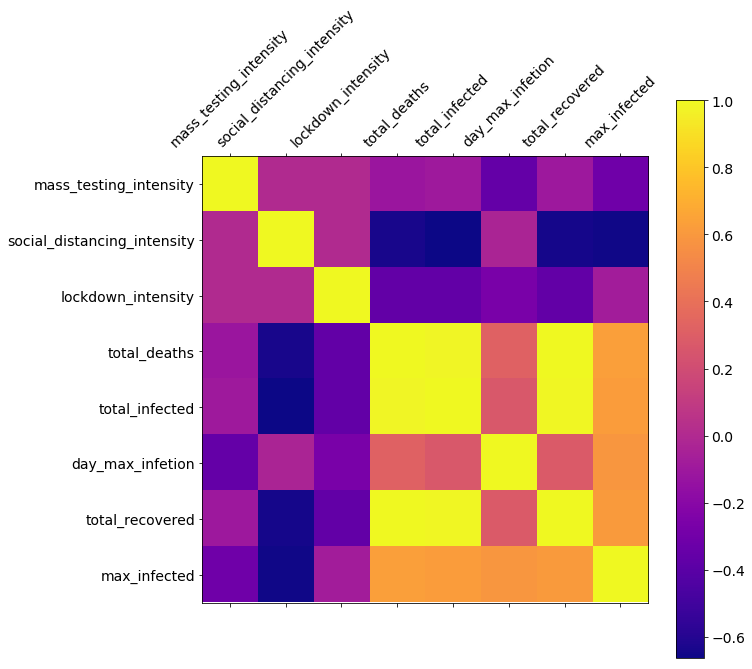

In [8]:
f = plt.figure(figsize=(10, 10))
plt.matshow(data.corr(), fignum=f.number,cmap=plt.cm.plasma)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [125]:
df = pd.read_csv('../processed_data/phase1_sim_raw.csv')

In [7]:
df.columns

Index(['day', 'hour', 'alive', 'uninfected', 'infected', 'recovered', 'deaths',
       'quarantined', 'max_infected', 'variance_infected', 'mean_infected',
       'run_no', 'avg_susceptibility', 'avg_recovery_time',
       'initial_population', 'initial_infected', 'average_death_rate',
       'average_recovery_rate', 'quarantine_delay', 'mass_testing_intensity',
       'social_distancing_intensity', 'lockdown_intensity'],
      dtype='object')

In [10]:
df['quarantine_delay'].value_counts()

7.0    8448
3.0    8448
1.0    8448
Name: quarantine_delay, dtype: int64

In [22]:
df[(df['lockdown_intensity'] > 0) 
   & (df['mass_testing_intensity'] == 0) 
   & (df['social_distancing_intensity'] == 0)]

,day,hour,alive,uninfected,infected,recovered,deaths,quarantined,max_infected,variance_infected,...,avg_susceptibility,avg_recovery_time,initial_population,initial_infected,average_death_rate,average_recovery_rate,quarantine_delay,mass_testing_intensity,social_distancing_intensity,lockdown_intensity
66,0,0,5000.0,4999.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,80.0
67,1,24,5000.0,4999.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,80.0
68,2,48,4999.0,4995.0,4.0,0.0,1.0,0.0,2.0,0.707107,...,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,80.0
69,3,72,4997.0,4992.0,5.0,0.0,3.0,0.0,2.0,0.577350,...,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,80.0
70,4,96,4995.0,4976.0,19.0,0.0,5.0,0.0,3.0,0.666667,...,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21379,61,1464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,504.0,5000.0,1.0,0.2,90.0,7.0,0.0,0.0,100.0
21380,62,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,504.0,5000.0,1.0,0.2,90.0,7.0,0.0,0.0,100.0
21381,63,1512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,504.0,5000.0,1.0,0.2,90.0,7.0,0.0,0.0,100.0
21382,64,1536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,504.0,5000.0,1.0,0.2,90.0,7.0,0.0,0.0,100.0


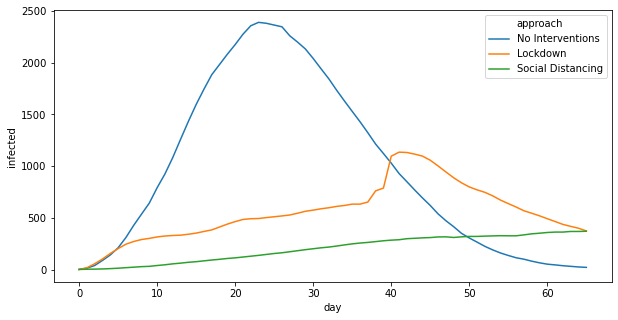

In [126]:
ld = df[(df['lockdown_intensity'] > 0) 
   & (df['mass_testing_intensity'] == 0) 
   & (df['social_distancing_intensity'] == 0)
    & (df['avg_susceptibility'] == 100)].groupby(by = 'day').mean().round().reset_index()[['day','infected','deaths','recovered', 'quarantine_delay']]
ld['approach'] = 'Lockdown'

mt = df[(df['lockdown_intensity'] == 0) 
   & (df['mass_testing_intensity'] == 0) 
   & (df['social_distancing_intensity'] == 0)
    & (df['avg_susceptibility'] == 100)].groupby(by = 'day').mean().round().reset_index()[['day','infected','deaths','recovered', 'quarantine_delay']]
#mt['approach'] = 'Mass Testing'
mt['approach'] = 'No Interventions'

sd = df[(df['lockdown_intensity'] == 0) 
   & (df['mass_testing_intensity'] == 0) 
   & (df['social_distancing_intensity'] > 0)
    & (df['avg_susceptibility'] == 100)].groupby(by = 'day').mean().round().reset_index()[['day','infected','deaths','recovered', 'quarantine_delay']]
sd['approach'] = 'Social Distancing'

#av = df[(df['lockdown_intensity'] == 0) 
#   & (df['mass_testing_intensity'] == 0) 
#   & (df['social_distancing_intensity'] == 0)
#   & (df['avg_susceptibility'] > 0)].groupby(by = 'day').mean().round().reset_index()[['day','infected','deaths','recovered', 'quarantine_delay']]
#av['approach'] = 'Personal Hygiene'

viz = mt.append([ld,sd])

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = 'day', y= 'infected',hue = 'approach', data = viz)

In [215]:
viz

,day,infected,deaths,recovered,quarantine_delay,approach
0,0,1.0,0.0,0.0,4.0,Lockdown
1,1,13.0,0.0,0.0,4.0,Lockdown
2,2,43.0,2.0,0.0,4.0,Lockdown
3,3,82.0,5.0,0.0,4.0,Lockdown
4,4,128.0,9.0,0.0,4.0,Lockdown
...,...,...,...,...,...,...
61,61,228.0,1196.0,706.0,4.0,Social Distancing
62,62,226.0,1208.0,714.0,4.0,Social Distancing
63,63,225.0,1218.0,723.0,4.0,Social Distancing
64,64,224.0,1229.0,731.0,4.0,Social Distancing


In [79]:
df[(df['lockdown_intensity'] == 0) 
   & (df['mass_testing_intensity'] >= 0) 
   & (df['social_distancing_intensity'] == 0)]['mass_testing_intensity'].unique()

array([  0.,  20.,  60., 100.])

In [129]:
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)

fig = px.line(viz, x="day", y="infected", title='Average Infection Trend per Simulation', color = 'approach',
             hover_data = ['infected'])

fig.update_layout(
    xaxis_title="Day",
    yaxis_title="Infected",
    legend_title = 'Intervention Method',
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)

py.plot(fig, filename='g5_2.html')

'g5_2.html'

In [226]:
import plotly.io as pio
pio.write_html(fig, file='index.html', auto_open=True)

In [104]:
data = pd.read_csv('../processed_data/phase1_sim_sum.csv')
viz = df.merge(data, on='run_no', how='left')

In [22]:
viz.columns

Index(['day', 'hour', 'alive', 'uninfected', 'infected', 'recovered', 'deaths',
       'quarantined', 'max_infected_x', 'variance_infected', 'mean_infected',
       'run_no', 'avg_susceptibility_x', 'avg_recovery_time_x',
       'initial_population_x', 'initial_infected_x', 'average_death_rate_x',
       'average_recovery_rate_x', 'quarantine_delay_x',
       'mass_testing_intensity_x', 'social_distancing_intensity_x',
       'lockdown_intensity_x', 'avg_susceptibility_y', 'avg_recovery_time_y',
       'initial_population_y', 'initial_infected_y', 'average_death_rate_y',
       'average_recovery_rate_y', 'quarantine_delay_y',
       'mass_testing_intensity_y', 'social_distancing_intensity_y',
       'lockdown_intensity_y', 'final_pop', 'day_max_infected',
       'day_max_infetion', 'total_infected', 'total_recovered', 'total_deaths',
       'total_quarantined', 'max_infected_y', 'max_variance', 'max_mean'],
      dtype='object')

In [105]:
test = viz.melt(id_vars = ['run_no','day','infected','deaths','recovered', 'mean_infected'])

In [106]:
test = test[test['variable'].isin(['lockdown_intensity_x', 'mass_testing_intensity_x', 'social_distancing_intensity_x'])]

In [107]:
test['filter'] = test['variable'] + " " + test['value'].astype(str)

In [108]:
test = test.merge(data, on='run_no', how='left')

In [109]:
test['filter'] = test['filter'].str.replace('lockdown_intensity_x','Lockdown Intensity:')
test['filter'] = test['filter'].str.replace('mass_testing_intensity_x','Mass Testing Intensity:')
test['filter'] = test['filter'].str.replace('social_distancing_intensity_x','Social Distancing Intensity:')

In [110]:
test.rename(columns={'mean_infected':'R0 (Reproduction No.)'}, inplace=True)

In [111]:
test.rename(columns={'avg_susceptibility':'agents_vulnerability'}, inplace=True)

In [112]:
test['%_population_infected'] = round(test['infected'] / 5000,2)

In [113]:
test[test['filter'].str.contains('Mass Testing')]['filter'].unique()

array(['Mass Testing Intensity: 0.0', 'Mass Testing Intensity: 20.0',
       'Mass Testing Intensity: 60.0', 'Mass Testing Intensity: 100.0'],
      dtype=object)

In [75]:
def generate_all_sim(chart):

    measure = chart

    fig = px.line(test, x="day", y= measure, title='Simulations: ' + measure.capitalize() +' Trend',  color = 'filter',
                 hover_data = ['mass_testing_intensity', 'social_distancing_intensity', 'lockdown_intensity','agents_vulnerability','quarantine_delay', 'R0 (Reproduction No.)', '%_population_infected'])


    fig.update_layout(
        xaxis_title="Day",
        yaxis_title= measure.capitalize(),
        legend_title = 'Intervention Method Intensity (%)',
        title={
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}
    )

    fig.update_layout(
        updatemenus=[
            dict(
                buttons=list(
                [
                    dict(
                      label = "Select Intervention Filter", method = "update",
                      args = [{"title": "Select Intervention Filter"} ]
                   ),
                    dict(
                      label = "All", method = "update",
                      args = [{"visible": [True, True, True, True,
                                          True, True, True, True,
                                          True, True, True, True]},{"title": "Simulations: " + measure.capitalize() + " Trend"} ]
                   ),
                    dict(
                      label = "Mass Testing", method = "update",
                      args = [{"visible": [True, True, True, True,
                                          False, False, False, False,
                                          False, False, False, False]},{"title": "Simulations: " + measure.capitalize() + " Trend - Mass Testing Filter"} ]
                   ),
                   dict(
                      label = "Social Distancing", method = "update",
                      args = [{"visible": [False, False, False, False,
                                          True, True, True, True,
                                          False, False, False, False]},{"title": "Simulations: " + measure.capitalize() + " Trend - Social Distancing Filter"} ]
                   ),
                    dict(
                      label = "Lockdown", method = "update",
                      args = [{"visible": [False, False, False, False,
                                          False, False, False, False,
                                          True, True, True, True]},{"title": "Simulations: " + measure.capitalize() + " Trend - Lockdown Filter"} ]
                   )
                ]
             )
            ),
        ]
    )




    py.plot(fig, filename='all_simulations_' + measure + '_trend_v2.html')
    
    
def generate_all_sim_nc(chart):

    measure = chart

    fig = px.line(test, x="day", y= measure, title='Simulations: ' + measure.capitalize() +' Trend', 
                 hover_data = ['mass_testing_intensity', 'social_distancing_intensity', 'lockdown_intensity','agents_vulnerability','quarantine_delay', 'R0 (Reproduction No.)', '%_population_infected'])


    fig.update_layout(
        xaxis_title="Day",
        yaxis_title= measure.capitalize(),
        legend_title = 'Intervention Method Intensity (%)',
        title={
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}
    )

    py.plot(fig, filename='all_simulations_' + measure + '.html')
    
    
def generate_graph(chart,name):

    measure = chart

    fig = px.line(test[(test['lockdown_intensity'].isin([80,90])) 
   & (test['mass_testing_intensity'] == 0) 
   & (test['social_distancing_intensity'] == 0)
    & (test['agents_vulnerability'] == 100)
    & (test['variable'] == 'lockdown_intensity_x')].sort_values(['run_no','day']), x="day", y= measure, title= 'Lockdown Simulations',
                 hover_data = ['mass_testing_intensity', 'social_distancing_intensity', 'lockdown_intensity', 'R0 (Reproduction No.)'])


    fig.update_layout(
        xaxis_title="Day",
        yaxis_title= measure.capitalize(),
        legend_title = 'Infection Trends of Lockdown Simulations',
        title={
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}
    )

    py.plot(fig, filename= name + '.html')

In [76]:
generate_graph('infected','g4_2')

In [78]:
test[(test['lockdown_intensity'].isin([80,90])) 
   & (test['mass_testing_intensity'] == 0) 
   & (test['social_distancing_intensity'] == 0)
    & (test['agents_vulnerability'] == 100)
    & (test['variable'] == 'lockdown_intensity_x')]['run_no'].unique()

array([194., 195., 258., 259., 322., 323.])

In [188]:
test['filter'].unique()

array(['Mass Testing Intensity: 0.0', 'Mass Testing Intensity: 20.0',
       'Mass Testing Intensity: 60.0', 'Mass Testing Intensity: 100.0',
       'Social Distancing Intensity: 0.0',
       'Social Distancing Intensity: 70.0',
       'Social Distancing Intensity: 80.0',
       'Social Distancing Intensity: 90.0', 'Lockdown Intensity: 0.0',
       'Lockdown Intensity: 80.0', 'Lockdown Intensity: 90.0',
       'Lockdown Intensity: 100.0'], dtype=object)

In [67]:
generate_all_sim_nc('recovered')
generate_all_sim('recovered')
generate_all_sim_nc('deaths')
generate_all_sim('deaths')
generate_all_sim_nc('infected')
generate_all_sim('infected')

# Article Graphs

In [19]:
test['filter'].unique()

array(['Mass Testing Intensity: 0.0', 'Mass Testing Intensity: 20.0',
       'Mass Testing Intensity: 60.0', 'Mass Testing Intensity: 100.0',
       'Social Distancing Intensity: 0.0',
       'Social Distancing Intensity: 70.0',
       'Social Distancing Intensity: 80.0',
       'Social Distancing Intensity: 90.0', 'Lockdown Intensity: 0.0',
       'Lockdown Intensity: 80.0', 'Lockdown Intensity: 90.0',
       'Lockdown Intensity: 100.0'], dtype=object)

In [27]:
test.columns

Index(['run_no', 'day', 'infected', 'deaths', 'recovered',
       'R0 (Reproduction No.)', 'variable', 'value', 'filter',
       'agents_vulnerability', 'avg_recovery_time', 'initial_population',
       'initial_infected', 'average_death_rate', 'average_recovery_rate',
       'quarantine_delay', 'mass_testing_intensity',
       'social_distancing_intensity', 'lockdown_intensity', 'final_pop',
       'day_max_infected', 'day_max_infetion', 'total_infected',
       'total_recovered', 'total_deaths', 'total_quarantined', 'max_infected',
       'max_variance', 'max_mean', '%_population_infected'],
      dtype='object')

In [33]:
test[(test['lockdown_intensity'] == 0) 
                   & (test['mass_testing_intensity'] == 20) 
     & (test['social_distancing_intensity'] == 0)
                 & (test['agents_vulnerability'] == 100)
                   & (test['filter'] == 'Mass Testing Intensity: 20.0')]['run_no']

,run_no,day,infected,deaths,recovered,R0 (Reproduction No.),variable,value,filter,agents_vulnerability,...,day_max_infected,day_max_infetion,total_infected,total_recovered,total_deaths,total_quarantined,max_infected,max_variance,max_mean,%_population_infected
13728,209.0,0,1.0,0.0,0.0,0.000000,mass_testing_intensity_x,20.0,Mass Testing Intensity: 20.0,100.0,...,48.0,34.0,2187.0,1853.0,3049.0,3856.0,12.0,1.760516,2.126214,0.00
13729,209.0,1,16.0,0.0,0.0,1.666667,mass_testing_intensity_x,20.0,Mass Testing Intensity: 20.0,100.0,...,48.0,34.0,2187.0,1853.0,3049.0,3856.0,12.0,1.760516,2.126214,0.00
13730,209.0,2,42.0,1.0,0.0,2.105263,mass_testing_intensity_x,20.0,Mass Testing Intensity: 20.0,100.0,...,48.0,34.0,2187.0,1853.0,3049.0,3856.0,12.0,1.760516,2.126214,0.01
13731,209.0,3,70.0,4.0,0.0,2.096774,mass_testing_intensity_x,20.0,Mass Testing Intensity: 20.0,100.0,...,48.0,34.0,2187.0,1853.0,3049.0,3856.0,12.0,1.760516,2.126214,0.01
13732,209.0,4,103.0,6.0,0.0,2.041667,mass_testing_intensity_x,20.0,Mass Testing Intensity: 20.0,100.0,...,48.0,34.0,2187.0,1853.0,3049.0,3856.0,12.0,1.760516,2.126214,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22237,337.0,61,97.0,3071.0,1832.0,1.991828,mass_testing_intensity_x,20.0,Mass Testing Intensity: 20.0,100.0,...,44.0,33.0,2222.0,1877.0,3082.0,869.0,10.0,1.369304,2.067708,0.02
22238,337.0,62,77.0,3076.0,1847.0,1.992835,mass_testing_intensity_x,20.0,Mass Testing Intensity: 20.0,100.0,...,44.0,33.0,2222.0,1877.0,3082.0,869.0,10.0,1.369304,2.067708,0.02
22239,337.0,63,60.0,3078.0,1862.0,1.991803,mass_testing_intensity_x,20.0,Mass Testing Intensity: 20.0,100.0,...,44.0,33.0,2222.0,1877.0,3082.0,869.0,10.0,1.369304,2.067708,0.01
22240,337.0,64,49.0,3081.0,1870.0,1.991803,mass_testing_intensity_x,20.0,Mass Testing Intensity: 20.0,100.0,...,44.0,33.0,2222.0,1877.0,3082.0,869.0,10.0,1.369304,2.067708,0.01


In [53]:
#G1 
#test[(test['lockdown_intensity'] == 0) 
#                   & (test['mass_testing_intensity'] >0 ) 
#    & (test['social_distancing_intensity'] == 0)
#                 & (test['agents_vulnerability'] == 100)]['run_no'].value_counts()

#G2 
#test[(test['lockdown_intensity'] == 0) 
#                   & (test['mass_testing_intensity'] == 20) 
#                   & (test['social_distancing_intensity'] == 0)
#                 & (test['agents_vulnerability'] == 100)
#                   & (test['filter'] == 'Mass Testing Intensity: 20.0')]['run_no'].value_counts()


#G4 
test[test['filter'].isin(['Lockdown Intensity: 80.0', 'Lockdown Intensity: 90.0'])], x="day", y= measure, title= 'Lockdown Simulations',  color = 'filter',
                 hover_data = ['mass_testing_intensity', 'social_distancing_intensity', 'lockdown_intensity','agents_vulnerability','quarantine_delay', 'R0 (Reproduction No.)', '%_population_infected'])

#G6
test[(test['lockdown_intensity'] == 0) 
                   & (test['mass_testing_intensity'] >0 ) 
     & (test['social_distancing_intensity'] > 0)
                 & (test['agents_vulnerability'] == 100)]['run_no'].value_counts()

In [17]:
#G3 Graph

mass_test = test[(test['filter'].isin(['Mass Testing Intensity: 60.0','Mass Testing Intensity: 20.0']))
     & (test['agents_vulnerability'] == 100)
    & (test['lockdown_intensity'] == 0)
    & (test['social_distancing_intensity'] == 0)][['day','infected','filter','quarantine_delay']]

mass_test = mass_test.fillna(0)

mass_test['day'] = mass_test['day'].astype(int)
mass_test['infected'] = mass_test['infected'].astype(int)
mass_test['quarantine_delay'] = mass_test['quarantine_delay'].astype(int)

import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = mass_test[(mass_test['quarantine_delay'] == 3) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 20.0')]['day'], 
                         y= mass_test[(mass_test['quarantine_delay'] == 3) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 20.0')]['infected'],
                          name='Mass Testing Intensity: 20.0',
                          legendgroup = 'a',
                         line=dict(color='blue'), hovertemplate = 'Quarantine Delay: 3' + '<br> Infected: %{y}',))
fig.add_trace(go.Scatter(x = mass_test[(mass_test['quarantine_delay'] == 1) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 20.0')]['day'], 
                         y= mass_test[(mass_test['quarantine_delay'] == 1) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 20.0')]['infected'],
                          name='Mass Testing Intensity: 20.0',
                          legendgroup = 'a',
                         showlegend = False,
                         line=dict(color='blue'), hovertemplate = 'Quarantine Delay: 1' + '<br> Infected: %{y}'))
fig.add_trace(go.Scatter(x = mass_test[(mass_test['quarantine_delay'] == 7) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 20.0')]['day'], 
                         y= mass_test[(mass_test['quarantine_delay'] == 7) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 20.0')]['infected'],
                          name='Mass Testing Intensity: 20.0',
                          legendgroup = 'a',
                         showlegend = False,
                         line=dict(color='blue'), hovertemplate = 'Quarantine Delay: 7' + '<br> Infected: %{y}'))

fig.add_trace(go.Scatter(x = mass_test[(mass_test['quarantine_delay'] == 3) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 60.0')]['day'], 
                         y= mass_test[(mass_test['quarantine_delay'] == 3) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 60.0')]['infected'],
                          name='Mass Testing Intensity: 60.0',
                         legendgroup = 'b',
                         line=dict(color='red'), hovertemplate = 'Quarantine Delay: 3' + '<br> Infected: %{y}'))
fig.add_trace(go.Scatter(x = mass_test[(mass_test['quarantine_delay'] == 1) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 60.0')]['day'], 
                         y= mass_test[(mass_test['quarantine_delay'] == 1) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 60.0')]['infected'],
                          name='Mass Testing Intensity: 60.0',
                         legendgroup = 'b',
                         showlegend = False,
                         line=dict(color='red'), hovertemplate = 'Quarantine Delay: 1' + '<br> Infected: %{y}'))
fig.add_trace(go.Scatter(x = mass_test[(mass_test['quarantine_delay'] == 7) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 60.0')]['day'], 
                         y= mass_test[(mass_test['quarantine_delay'] == 7) & 
                               (mass_test['filter'] == 'Mass Testing Intensity: 60.0')]['infected'],
                          name='Mass Testing Intensity: 60.0',
                         legendgroup = 'b',
                         showlegend = False,
                         line=dict(color='red'), hovertemplate = 'Quarantine Delay: 7' + '<br> Infected: %{y}'))

fig.update_layout(
    xaxis_title="Day",
    yaxis_title= 'Infected',
    legend_title = 'Mass Testing Intervetions',
    title={"text": "Mass Testing Comparison 20% vs 60%",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

py.plot(fig, filename= 'g3_2.html')

'g3_2.html'

In [48]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = test[(test['lockdown_intensity'] == 0) 
                         & (test['mass_testing_intensity'] == 0 ) 
                          & (test['quarantine_delay'] == 7 ) 
                          & (test['social_distancing_intensity'] == 0)
                          & (test['agents_vulnerability'] == 100)]['day'].head(66), 
                         
                         y= test[(test['lockdown_intensity'] == 0) 
                                 & (test['mass_testing_intensity'] == 0 ) 
                                   & (test['quarantine_delay'] == 7 ) 
                                   & (test['social_distancing_intensity'] == 0)
                                   & (test['agents_vulnerability'] == 100)]['infected'].head(66),
                          name='0%',
                         line=dict(color='blue'), hovertemplate = 'Infected: %{y}',))

fig.add_trace(go.Scatter(x = test[(test['lockdown_intensity'] == 0) 
                         & (test['mass_testing_intensity'] == 20 ) 
                          & (test['quarantine_delay'] == 7 ) 
                          & (test['social_distancing_intensity'] == 0)
                          & (test['agents_vulnerability'] == 100)]['day'].head(66), 
                         
                         y= test[(test['lockdown_intensity'] == 0) 
                                   & (test['mass_testing_intensity'] == 20 ) 
                                   & (test['quarantine_delay'] == 7 ) 
                                   & (test['social_distancing_intensity'] == 0)
                                   & (test['agents_vulnerability'] == 100)]['infected'].head(66),
                          name='20%',
                         line=dict(color='red'), hovertemplate = 'Infected: %{y}',))

fig.add_trace(go.Scatter(x = test[(test['lockdown_intensity'] == 0) 
                         & (test['mass_testing_intensity'] == 60 ) 
                          & (test['quarantine_delay'] == 7 ) 
                          & (test['social_distancing_intensity'] == 0)
                          & (test['agents_vulnerability'] == 100)]['day'].head(66), 
                         
                         y= test[(test['lockdown_intensity'] == 0) 
                                   & (test['mass_testing_intensity'] == 60 ) 
                                   & (test['quarantine_delay'] == 7 ) 
                                   & (test['social_distancing_intensity'] == 0)
                                   & (test['agents_vulnerability'] == 100)]['infected'].head(66),
                          name='60%',
                         line=dict(color='orange'), hovertemplate = 'Infected: %{y}',))


fig.add_trace(go.Scatter(x = test[(test['lockdown_intensity'] == 0) 
                         & (test['mass_testing_intensity'] == 100 ) 
                          & (test['quarantine_delay'] == 7 ) 
                          & (test['social_distancing_intensity'] == 0)
                          & (test['agents_vulnerability'] == 100)]['day'].head(66), 
                         
                         y= test[(test['lockdown_intensity'] == 0) 
                                   & (test['mass_testing_intensity'] == 100 ) 
                                   & (test['quarantine_delay'] == 7 ) 
                                   & (test['social_distancing_intensity'] == 0)
                                   & (test['agents_vulnerability'] == 100)]['infected'].head(66),
                          name='100%',
                         line=dict(color='green'), hovertemplate = 'Infected: %{y}',))



fig.update_layout(
    xaxis_title="Day",
    yaxis_title= 'Infected',
    legend_title = 'Mass Testing Intensities',
    title={"text": "Mass Testing Infection Comparisons",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

py.plot(fig, filename= 'g1.html')

'g1.html'

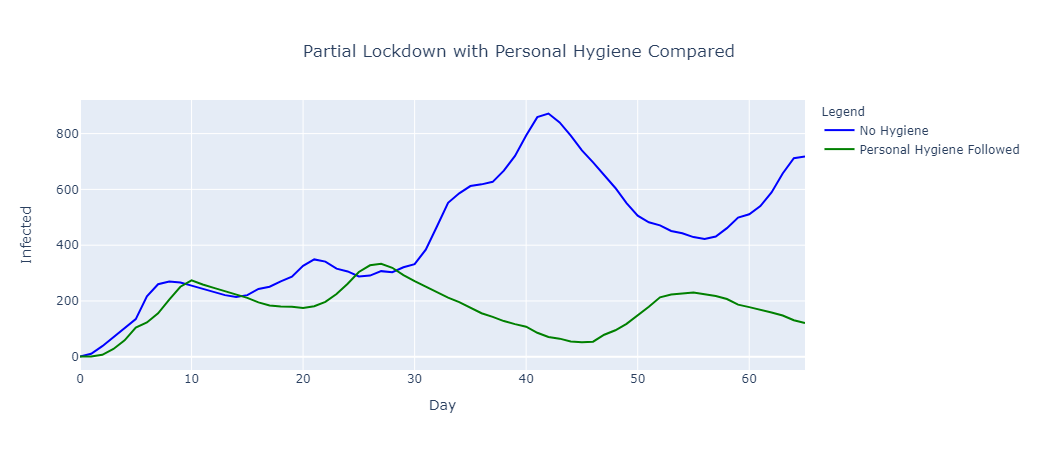

In [114]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = test[(test['lockdown_intensity'] == 90) 
                         & (test['mass_testing_intensity'] == 0 ) 
                          & (test['social_distancing_intensity'] == 0)
                          & (test['agents_vulnerability'] == 100)]['day'].head(66), 
                         
                         y= test[(test['lockdown_intensity'] == 90) 
                                 & (test['mass_testing_intensity'] == 0 ) 
                                   & (test['social_distancing_intensity'] == 0)
                                   & (test['agents_vulnerability'] == 100)]['infected'].head(66),
                          name='No Hygiene',
                         line=dict(color='blue'), hovertemplate = 'Infected: %{y}',))

fig.add_trace(go.Scatter(x = test[(test['lockdown_intensity'] == 90) 
                         & (test['mass_testing_intensity'] == 0 ) 
                          & (test['social_distancing_intensity'] == 0)
                          & (test['agents_vulnerability'] == 60)]['day'].head(66), 
                         
                         y= test[(test['lockdown_intensity'] == 90) 
                                   & (test['mass_testing_intensity'] == 0 ) 
                                   & (test['social_distancing_intensity'] == 0)
                                   & (test['agents_vulnerability'] == 60)]['infected'].tail(66),
                          name='Personal Hygiene Followed',
                         line=dict(color='green'), hovertemplate = 'Infected: %{y}',))

fig.update_layout(
    xaxis_title="Day",
    yaxis_title= 'Infected',
    legend_title = 'Legend',
    title={"text": "Partial Lockdown with Personal Hygiene Compared",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

#py.plot(fig, filename= 'g6_2.html')

In [95]:
from scipy.signal import find_peaks


In [123]:
import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Scatter(x = test[(test['run_no'] == 194.)
                          & (test['variable'] == 'lockdown_intensity_x')]['day'], 
                         
                         y= test[(test['run_no'] == 194.)
                          & (test['variable'] == 'lockdown_intensity_x')]['infected'], 
                         name = '194',
                         hovertemplate = 'Infected: %{y}',))

fig.add_trace(go.Scatter(x = test[(test['run_no'] == 195.)
                          & (test['variable'] == 'lockdown_intensity_x')]['day'], 
                         
                         y= test[(test['run_no'] == 195.)
                          & (test['variable'] == 'lockdown_intensity_x')]['infected'], 
                         
                         name = '195', hovertemplate = 'Infected: %{y}',))

fig.add_trace(go.Scatter(x = test[(test['run_no'] == 258.)
                          & (test['variable'] == 'lockdown_intensity_x')]['day'], 
                         
                         y= test[(test['run_no'] == 258.)
                          & (test['variable'] == 'lockdown_intensity_x')]['infected'], 
                         
                         name = '258', hovertemplate = 'Infected: %{y}',))

fig.add_trace(go.Scatter(x = test[(test['run_no'] == 259.)
                          & (test['variable'] == 'lockdown_intensity_x')]['day'], 
                         
                         y= test[(test['run_no'] == 259.)
                          & (test['variable'] == 'lockdown_intensity_x')]['infected'], 
                         
                         name = '259', hovertemplate = 'Infected: %{y}',))

fig.add_trace(go.Scatter(x = test[(test['run_no'] == 322.)
                          & (test['variable'] == 'lockdown_intensity_x')]['day'], 
                         
                         y= test[(test['run_no'] == 322.)
                          & (test['variable'] == 'lockdown_intensity_x')]['infected'], 
                         
                         name = '322', hovertemplate = 'Infected: %{y}',))

fig.add_trace(go.Scatter(x = test[(test['run_no'] == 323.)
                          & (test['variable'] == 'lockdown_intensity_x')]['day'], 
                         
                         y= test[(test['run_no'] == 323.)
                          & (test['variable'] == 'lockdown_intensity_x')]['infected'], 
                         
                         name = '323', hovertemplate = 'Infected: %{y}',))

fig.update_layout(
    xaxis_title="Day",
    showlegend=True,
    legend_title = 'Simulation Number:',
    yaxis_title= 'Infected',
    title={"text": "Partial Lockdown Simulations Trend",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

py.plot(fig, filename= 'g4_2.html')

'g4_2.html'

# NCR vs Reg 7 Graph

In [130]:
doh = pd.read_csv('DOH COVID Data.csv')

In [131]:
doh = doh[doh['RegionRes'].isin(['NCR','Region VII: Central Visayas'])]

In [124]:
doh = doh[['DateRepConf','RegionRes']]

In [135]:
doh = doh.groupby(['DateRepConf','RegionRes']).size().reset_index()

In [137]:
doh.columns = (['Date', 'Region', 'Reported Cases'])

In [140]:
fig = px.line(doh, x="Date", y= 'Reported Cases', color = 'Region', title = 'NCR vs Region VII Reported Cases')
py.plot(fig, filename= 'repcasecomp.html')

'repcasecomp.html'

# Function Dev ------------------------------------------------------------------

In [11]:
metrics_df = pd.read_csv('../raw_data/phase1_results.csv',header = None,skiprows = 6, nrows = 11, usecols =[0,1])
metrics_df.columns = (['metric', 'value'])
metrics_df

,metric,value
0,[run number],1.0
1,average-susceptibility,60.0
2,average-recovery-time,504.0
3,initial-population,5000.0
4,initial-infected,1.0
5,average-death-rate,0.2
6,average-recovery-rate,90.0
7,quarantine-delay,1.0
8,mass-testing-intensity,0.0
9,social-distancing-intensity,0.0


In [12]:
sim_df = pd.read_csv('../raw_data/phase1_results.csv',header=0,skiprows = 24, nrows = 1564, usecols =[1 + 9,2 + 9,3 + 9,4+ 9,5+ 9,6+ 9,7+ 9,8+ 9,9+ 9])
sim_df = sim_df.reset_index()
sim_df.columns = (['hour','alive', 'uninfected', 'infected', 'recovered', 'deaths', 'quarantined', 'max_infected', 'variance_infected','mean_infected'])
sim_df = sim_df[(sim_df['hour'] % 24) == 0].reset_index(drop = True)
sim_df.index = sim_df.index.set_names(['day'])
sim_df = sim_df.reset_index()
sim_df

,day,hour,alive,uninfected,infected,recovered,deaths,quarantined,max_infected,variance_infected,mean_infected
0,0,0,5000,4999,1,0,0,0,0,0.000000,0.000000
1,1,24,5000,4999,1,0,0,0,0,0.000000,0.000000
2,2,48,4999,4995,4,0,1,0,2,0.707107,1.500000
3,3,72,4997,4992,5,0,3,0,2,0.577350,1.333333
4,4,96,4995,4976,19,0,5,0,3,0.666667,1.777778
5,5,120,4994,4954,40,0,6,0,4,0.813575,1.809524
6,6,144,4991,4925,66,0,9,0,6,1.299038,2.000000
7,7,168,4986,4878,108,0,14,0,6,1.248376,1.928571
8,8,192,4983,4823,159,1,17,0,7,1.349871,1.975000
9,9,216,4971,4738,232,1,29,0,8,1.414108,2.017241


In [13]:
sim_df['run_no'] = metrics_df['value'][0]
sim_df['avg_susceptibility'] = metrics_df['value'][1]
sim_df['avg_recovery_time'] = metrics_df['value'][2]
sim_df['initial_population'] = metrics_df['value'][3]
sim_df['initial_infected'] = metrics_df['value'][4]
sim_df['average_death_rate'] = metrics_df['value'][5]
sim_df['average_recovery_rate'] = metrics_df['value'][6]
sim_df['quarantine_delay'] = metrics_df['value'][7]
sim_df['mass_testing_intensity'] = metrics_df['value'][8]
sim_df['social_distancing_intensity'] = metrics_df['value'][9]

In [17]:
raw_sim_data = pd.DataFrame(columns = ['day', 'hour', 'alive', 'uninfected', 'infected', 'recovered', 'deaths',
       'quarantined', 'max_infected', 'variance_infected', 'mean_infected',
       'run_no', 'avg_susceptibility', 'avg_recovery_time',
       'initial_population', 'initial_infected', 'average_death_rate',
       'average_recovery_rate', 'quarantine_delay', 'mass_testing_intensity',
       'social_distancing_intensity'])

In [18]:
raw_sim_data.append(sim_df)

,day,hour,alive,uninfected,infected,recovered,deaths,quarantined,max_infected,variance_infected,...,run_no,avg_susceptibility,avg_recovery_time,initial_population,initial_infected,average_death_rate,average_recovery_rate,quarantine_delay,mass_testing_intensity,social_distancing_intensity
0,0,0,5000,4999,1,0,0,0,0,0.000000,...,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0
1,1,24,5000,4999,1,0,0,0,0,0.000000,...,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0
2,2,48,4999,4995,4,0,1,0,2,0.707107,...,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0
3,3,72,4997,4992,5,0,3,0,2,0.577350,...,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0
4,4,96,4995,4976,19,0,5,0,3,0.666667,...,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0
5,5,120,4994,4954,40,0,6,0,4,0.813575,...,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0
6,6,144,4991,4925,66,0,9,0,6,1.299038,...,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0
7,7,168,4986,4878,108,0,14,0,6,1.248376,...,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0
8,8,192,4983,4823,159,1,17,0,7,1.349871,...,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0
9,9,216,4971,4738,232,1,29,0,8,1.414108,...,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0


In [131]:
#Metrics -------------------

run_no = metrics_df['value'][0]
avg_susceptibility = metrics_df['value'][1]
avg_recovery_time = metrics_df['value'][2]
initial_population = metrics_df['value'][3]
initial_infected = metrics_df['value'][4]
average_death_rate = metrics_df['value'][5]
average_recovery_rate = metrics_df['value'][6]
quarantine_delay = metrics_df['value'][7]
mass_testing_intensity = metrics_df['value'][8]
social_distancing_intensity = metrics_df['value'][9]

#Results -------------------

#final population
final_pop = min(sim_df['alive'])
#day_mostly_infected
day_max_infected = min(sim_df[sim_df['uninfected'] == min(sim_df['uninfected'])]['day'])
#day_peak_infection
day_max_infetion = min(sim_df[sim_df['infected'] == max(sim_df['infected'])]['day'])
#total recovered
total_recovered = max(sim_df['recovered'])
#total deaths
total_deaths = max(sim_df['deaths'])
#total quarantined
total_quarantined = max(sim_df['quarantined'])
#peak number infected by person
max_infected = max(sim_df['max_infected'])
#max_variance 
max_variance = max(sim_df['variance_infected'])
#max mean
max_mean = max(sim_df['mean_infected'])

In [134]:
runs_df = runs_df.append(pd.Series([run_no,
                                   avg_susceptibility, 
                                   avg_recovery_time, 
                                   initial_population, 
                                   initial_infected, 
                                   average_death_rate, 
                                   average_recovery_rate, 
                                   quarantine_delay,
                                   mass_testing_intensity,
                                   social_distancing_intensity,
                                   final_pop,
                                   day_max_infected,
                                   day_max_infetion,
                                   total_recovered,
                                   total_deaths,
                                   total_quarantined,
                                   max_infected,
                                   max_variance,
                                   max_mean], index = runs_df.columns ), ignore_index=True)

In [135]:
runs_df

,run_no,avg_susceptibility,avg_recovery_time,initial_population,initial_infected,average_death_rate,average_recovery_rate,quarantine_delay,mass_testing_intensity,social_distancing_intensity,final_pop,day_max_infected,day_max_infetion,total_recovered,total_deaths,total_quarantined,max_infected,max_variance,max_mean
0,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,1931.0,36.0,25.0,1930.0,3069.0,0.0,10.0,1.402448,2.333333
1,1.0,60.0,504.0,5000.0,1.0,0.2,90.0,1.0,0.0,0.0,1931.0,36.0,25.0,1930.0,3069.0,0.0,10.0,1.402448,2.333333
